# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

### Import dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from citipy import citipy
import requests
from api_keys import weather_api_key
from scipy.stats import linregress

### Import API Keys

## Generate Cities List

Generate a list of unique cities based on a random latitude and longitude and using citypy library

In [2]:
# Size of the list of cities
num_cities = 700
latitude_max = 90
longitude_max = 180

cities_list = []
country_list = []
lat_list = []
lng_list = []


while len(cities_list) < num_cities:
    
    # Generate a random latitude using numpy random array multiplied by 90 that is the maximum for latitude
    # and multiple by a random +1 or -1 to give the North or South from Equator
    lat_random = ((latitude_max*np.random.rand(1,1))*(np.random.randint(2, size=1)*2-1))

    # Generate a random longitude using numpy random array multiplied by 180 that is the maximum for longitude
    # and multiple by a random +1 or -1 to give the East or West from Greenwich
    lon_random = ((longitude_max*np.random.rand(1,1))*(np.random.randint(2, size=1)*2-1))

    # Create a list of cities based on the random coordinates and using the citypy library
    city = citipy.nearest_city(lat_random[0][0], lon_random[0][0])
    new_city = city.city_name.title()
    new_city_country = city.country_code.upper()
    

    # Logical test to verify if the city is already include in the list or not
    if new_city not in cities_list:
        cities_list.append(new_city)
        country_list.append(new_city_country)
        lat_list.append(lat_random[0][0])
        lng_list.append(lon_random[0][0])

        
print(f'List of cities has {len(cities_list)} cities.')

List of cities has 700 cities.


In [3]:
# Create a dataframe with the random latitude and longitude

cities_df = pd.DataFrame({'City':cities_list,
                          'Lat':lat_list,
                          'Lng':lng_list,
                          'Max Temp':'',
                          'Humidity':'',
                          'Cloudiness':'',
                          'Wind Speed':'',
                          'Country':country_list,
                          'Date':''})

cities_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ukiah,38.297239,-125.054691,,,,,US,
1,Burns Lake,52.247431,-125.398081,,,,,CA,
2,Ancud,-40.240376,-86.028887,,,,,CL,
3,Narsaq,80.987474,-63.362041,,,,,GL,
4,Hobart,-76.810706,141.853985,,,,,AU,
...,...,...,...,...,...,...,...,...,...
695,Kismayo,-1.133837,44.499318,,,,,SO,
696,Batouri,4.069990,14.647881,,,,,CM,
697,Rio Brilhante,-21.742862,-54.214568,,,,,BR,
698,Palmer,60.566420,-147.557231,,,,,US,


In [4]:
# Double check if the list only has unique cities
print(f"The list of cities has {len(cities_df['City'].unique())} unique cities.")


The list of cities has 700 unique cities.


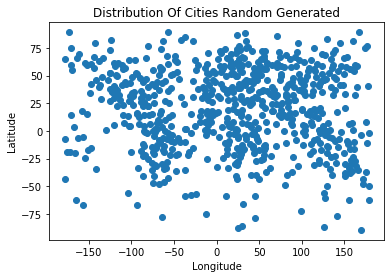

In [5]:
# Generate a scatterplot of the random coordinates.
# Note that coordinates looks to be evenly distributed.
# since the numpy random number distribution has uniform distribution

plt.scatter(x=cities_df['Lng'], y=cities_df['Lat'])
plt.title('distribution of cities random generated'.title())
plt.xlabel('Longitude')
plt.ylabel('Latitude');

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [6]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="


# set up lists to hold reponse info
hum = []
max_temp = []
cloudiness = []
wind_speed = []
time_data_calculation = []
n = 0

# Loop through the list of cities and perform a request for data on each
for city in cities_df['City']:
    response = requests.get(query_url + city).json()


    # Handle exception in case of city data not available in the API
    try:
        print(f"Processing Record {n} of {len(cities_df['City'])} | {city}")
        hum.append(response['main']['humidity'])
        max_temp.append(response['main']['temp_max'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        time_data_calculation.append(response['dt'])
    except KeyError:
        print(f"City {city} not found. Skipping...")
        hum.append(np.nan)
        max_temp.append(np.nan)
        cloudiness.append(np.nan)
        wind_speed.append(np.nan)
        time_data_calculation.append(np.nan)
    
    n += 1

    
print('-----------------------------')
print('Data Retrieval Complete')
print('-----------------------------')

Processing Record 0 of 700 | Ukiah
Processing Record 1 of 700 | Burns Lake
Processing Record 2 of 700 | Ancud
Processing Record 3 of 700 | Narsaq
Processing Record 4 of 700 | Hobart
Processing Record 5 of 700 | Lavrentiya
Processing Record 6 of 700 | Mataura
Processing Record 7 of 700 | Bonavista
Processing Record 8 of 700 | Ushuaia
Processing Record 9 of 700 | Bredasdorp
Processing Record 10 of 700 | Rikitea
Processing Record 11 of 700 | Burayevo
Processing Record 12 of 700 | Jamestown
Processing Record 13 of 700 | Castro
Processing Record 14 of 700 | Marcona
City Marcona not found. Skipping...
Processing Record 15 of 700 | Cabra
Processing Record 16 of 700 | Yellowknife
Processing Record 17 of 700 | Nantucket
Processing Record 18 of 700 | Danielskuil
Processing Record 19 of 700 | Kaitangata
Processing Record 20 of 700 | Qaanaaq
Processing Record 21 of 700 | Kapaa
Processing Record 22 of 700 | Punta Arenas
Processing Record 23 of 700 | Merauke
Processing Record 24 of 700 | Mecca
Proce

Processing Record 193 of 700 | Saldanha
Processing Record 194 of 700 | Namatanai
Processing Record 195 of 700 | Samusu
City Samusu not found. Skipping...
Processing Record 196 of 700 | Thompson
Processing Record 197 of 700 | Nelson Bay
Processing Record 198 of 700 | Loukhi
Processing Record 199 of 700 | Hay River
Processing Record 200 of 700 | Mys Shmidta
City Mys Shmidta not found. Skipping...
Processing Record 201 of 700 | Neyshabur
Processing Record 202 of 700 | Mitu
Processing Record 203 of 700 | Nakusp
Processing Record 204 of 700 | Cordoba
Processing Record 205 of 700 | Yangambi
Processing Record 206 of 700 | Port-De-Bouc
Processing Record 207 of 700 | Rio Grande
Processing Record 208 of 700 | Zachagansk
City Zachagansk not found. Skipping...
Processing Record 209 of 700 | Ust-Tsilma
Processing Record 210 of 700 | Provideniya
Processing Record 211 of 700 | Codrington
Processing Record 212 of 700 | Mopti
Processing Record 213 of 700 | Vysokogornyy
Processing Record 214 of 700 | Co

Processing Record 384 of 700 | San Lorenzo
Processing Record 385 of 700 | Santa Cruz
Processing Record 386 of 700 | Pascagoula
Processing Record 387 of 700 | Jacareacanga
Processing Record 388 of 700 | Grajau
Processing Record 389 of 700 | Todos Santos
Processing Record 390 of 700 | Katherine
Processing Record 391 of 700 | Moron
Processing Record 392 of 700 | Ilulissat
Processing Record 393 of 700 | Oxford
Processing Record 394 of 700 | Chumikan
Processing Record 395 of 700 | De Aar
Processing Record 396 of 700 | Jawhar
Processing Record 397 of 700 | Urumqi
Processing Record 398 of 700 | Xingcheng
Processing Record 399 of 700 | Ahipara
Processing Record 400 of 700 | Davila
Processing Record 401 of 700 | Tapaua
City Tapaua not found. Skipping...
Processing Record 402 of 700 | Saint-Joseph
Processing Record 403 of 700 | Dicabisagan
Processing Record 404 of 700 | Sistranda
Processing Record 405 of 700 | Lakes Entrance
Processing Record 406 of 700 | Maceio
Processing Record 407 of 700 | Du

Processing Record 577 of 700 | Mastic
Processing Record 578 of 700 | North Ogden
Processing Record 579 of 700 | Sudova Vyshnya
Processing Record 580 of 700 | Morant Bay
Processing Record 581 of 700 | Narasannapeta
Processing Record 582 of 700 | Liverpool
Processing Record 583 of 700 | Strelka
Processing Record 584 of 700 | Thessalon
Processing Record 585 of 700 | Tricase
Processing Record 586 of 700 | Macusani
Processing Record 587 of 700 | Sijunjung
Processing Record 588 of 700 | Novyy Urgal
Processing Record 589 of 700 | Kirakira
Processing Record 590 of 700 | Zhuhai
Processing Record 591 of 700 | Bathsheba
Processing Record 592 of 700 | Ler
Processing Record 593 of 700 | Altus
Processing Record 594 of 700 | Pokrovsk-Uralskiy
City Pokrovsk-Uralskiy not found. Skipping...
Processing Record 595 of 700 | Grand River South East
City Grand River South East not found. Skipping...
Processing Record 596 of 700 | Bukachacha
Processing Record 597 of 700 | Lysyye Gory
Processing Record 598 of 7

In [7]:
# Update the dataframe with the data colected from the API for Max Temp, Humidity, Cloudiness, Wind Speed, Date
cities_df['Max Temp'] = max_temp
cities_df['Humidity'] = hum
cities_df['Cloudiness'] = cloudiness
cities_df['Wind Speed'] = wind_speed
cities_df['Date'] = time_data_calculation

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [8]:
cities_df.to_csv('data/city_weather.csv')

In [9]:
cities_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ukiah,38.297239,-125.054691,62.60,67.0,90.0,2.24,US,1.599893e+09
1,Burns Lake,52.247431,-125.398081,53.11,71.0,100.0,1.43,CA,1.599893e+09
2,Ancud,-40.240376,-86.028887,45.00,100.0,54.0,15.99,CL,1.599893e+09
3,Narsaq,80.987474,-63.362041,33.80,43.0,0.0,8.05,GL,1.599893e+09
4,Hobart,-76.810706,141.853985,54.00,58.0,75.0,8.05,AU,1.599893e+09
...,...,...,...,...,...,...,...,...,...
695,Kismayo,-1.133837,44.499318,80.91,69.0,33.0,17.29,SO,1.599893e+09
696,Batouri,4.069990,14.647881,68.70,97.0,100.0,3.04,CM,1.599893e+09
697,Rio Brilhante,-21.742862,-54.214568,72.64,28.0,2.0,3.85,BR,1.599893e+09
698,Palmer,60.566420,-147.557231,50.00,93.0,20.0,3.74,US,1.599893e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [10]:
filter_hum = cities_df['Humidity'].loc[cities_df['Humidity'] > 100]
filter_hum

Series([], Name: Humidity, dtype: float64)

In [11]:
#  Get the indices of cities that have humidity over 100%.
indexes_hum = filter_hum.keys()
indexes_hum

Int64Index([], dtype='int64')

In [12]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = cities_df
clean_city_data.drop(clean_city_data.iloc[indexes_hum].index, inplace=True)

# Drop NA values inserted to handle missing values
clean_city_data.dropna(inplace=True)
clean_city_data

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ukiah,38.297239,-125.054691,62.60,67.0,90.0,2.24,US,1.599893e+09
1,Burns Lake,52.247431,-125.398081,53.11,71.0,100.0,1.43,CA,1.599893e+09
2,Ancud,-40.240376,-86.028887,45.00,100.0,54.0,15.99,CL,1.599893e+09
3,Narsaq,80.987474,-63.362041,33.80,43.0,0.0,8.05,GL,1.599893e+09
4,Hobart,-76.810706,141.853985,54.00,58.0,75.0,8.05,AU,1.599893e+09
...,...,...,...,...,...,...,...,...,...
695,Kismayo,-1.133837,44.499318,80.91,69.0,33.0,17.29,SO,1.599893e+09
696,Batouri,4.069990,14.647881,68.70,97.0,100.0,3.04,CM,1.599893e+09
697,Rio Brilhante,-21.742862,-54.214568,72.64,28.0,2.0,3.85,BR,1.599893e+09
698,Palmer,60.566420,-147.557231,50.00,93.0,20.0,3.74,US,1.599893e+09


In [13]:
clean_city_data.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,646.000000,646.000000,646.000000,646.000000,646.000000,646.000000,6.460000e+02
mean,18.884422,16.717124,67.206378,69.165635,48.156347,7.474365,1.599893e+09
std,36.790986,90.708836,15.024381,21.939709,40.498698,5.367779,9.591571e+01
min,-89.314650,-178.606356,26.150000,1.000000,0.000000,0.270000,1.599893e+09
25%,-8.328368,-61.671347,55.412500,56.250000,1.000000,3.360000,1.599893e+09
50%,23.113982,24.189182,69.270000,74.000000,40.000000,5.880000,1.599893e+09
75%,49.073051,91.609704,78.800000,87.000000,90.000000,10.290000,1.599893e+09
max,88.975266,179.072276,102.200000,100.000000,100.000000,33.330000,1.599893e+09


In [14]:
# Convert the time_data_calculation
date_rec = pd.to_datetime(clean_city_data['Date'], unit='s')
# str(date_rec[1])[:-9]

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

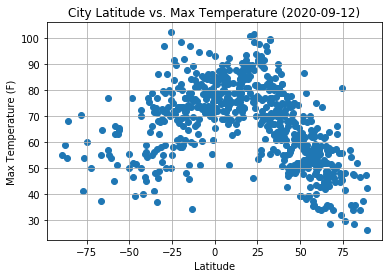

In [38]:
# Plot Latitude vs. Temperature
plt.scatter(x=clean_city_data['Lat'], y=cities_df['Max Temp'])
plt.grid(True)
plt.title('distribution of cities random generated'.title())
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title(f"City Latitude vs. Max Temperature ({str(date_rec[1])[:-9]})");
plt.savefig('data/Fig_1_Lat_vs_Temp.png')

## Latitude vs. Humidity Plot

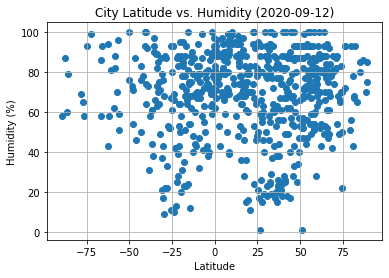

In [39]:
# Plot Latitude vs. Humidity
plt.scatter(x=clean_city_data['Lat'], y=cities_df['Humidity'])
plt.grid(True)
plt.title('distribution of cities random generated'.title())
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title(f"City Latitude vs. Humidity ({str(date_rec[1])[:-9]})");
plt.savefig('data/Fig_2_Lat_vs_Hum.png')

## Latitude vs. Cloudiness Plot

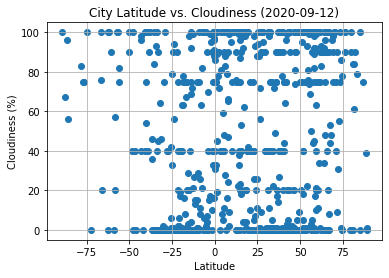

In [40]:
# Plot Latitude vs. Humidity
plt.scatter(x=clean_city_data['Lat'], y=cities_df['Cloudiness'])
plt.grid(True)
plt.title('distribution of cities random generated'.title())
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title(f"City Latitude vs. Cloudiness ({str(date_rec[1])[:-9]})");
plt.savefig('data/Fig_3_Lat_vs_Cloudiness.png')

## Latitude vs. Wind Speed Plot

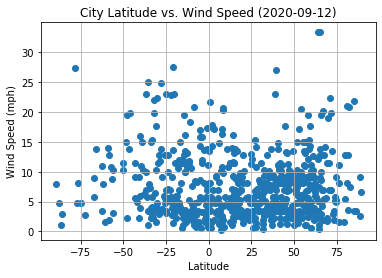

In [41]:
# Plot Latitude vs. Humidity
plt.scatter(x=clean_city_data['Lat'], y=cities_df['Wind Speed'])
plt.grid(True)
plt.title('distribution of cities random generated'.title())
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title(f"City Latitude vs. Wind Speed ({str(date_rec[1])[:-9]})");
plt.savefig('data/Fig_4_Lat_vs_Wind.png')

## Linear Regression

In [42]:
north_hem_pct = round(100*len(clean_city_data['Lat'].loc[clean_city_data['Lat']>0])/len(clean_city_data['Lat']),2)
south_hem_pct = round(100*len(clean_city_data['Lat'].loc[clean_city_data['Lat']<0])/len(clean_city_data['Lat']),2)
print(f"Northern Hemisphere cities: {north_hem_pct}% | Southern Hemisphere cities: {south_hem_pct}%")

Northern Hemisphere cities: 69.04% | Southern Hemisphere cities: 30.96%


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [43]:
x_values = np.array(clean_city_data['Lat'].loc[clean_city_data['Lat']>0])
y_values = np.array(clean_city_data['Max Temp'].loc[clean_city_data['Lat']>0])

# Run the regression and store each of the returned values
slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)

# Calculate the predictions for each value of x
regression_values = x_values * slope + intercept

# store a string version of the linear equation, so we can display it on the plot
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

The r-squared is: 0.5612419483404135


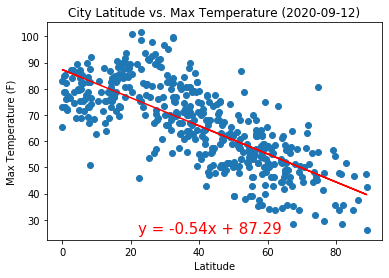

In [44]:
# plt.figure(figsize=(15,6))

plt.scatter(x=x_values, y=y_values)

# Plot the regression line
plt.plot(x_values, regression_values, "red")

# Annotate the plot with the linear equation
plt.annotate(line_eq, (22, 25), fontsize=15, color="red")


plt.title('distribution of cities random generated'.title())
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title(f"City Latitude vs. Max Temperature ({str(date_rec[1])[:-9]})");
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [45]:
x_values = np.array(clean_city_data['Lat'].loc[clean_city_data['Lat']<0])
y_values = np.array(clean_city_data['Max Temp'].loc[clean_city_data['Lat']<0])

# Run the regression and store each of the returned values
slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)

# Calculate the predictions for each value of x
regression_values = x_values * slope + intercept

# store a string version of the linear equation, so we can display it on the plot
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

The r-squared is: 0.24453240389824288


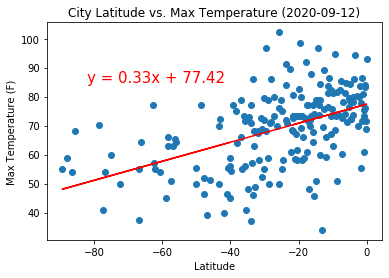

In [46]:
# plt.figure(figsize=(15,6))

plt.scatter(x=x_values, y=y_values)

# Plot the regression line
plt.plot(x_values, regression_values, "red")

# Annotate the plot with the linear equation
plt.annotate(line_eq, (-82, 85), fontsize=15, color="red")


plt.title('distribution of cities random generated'.title())
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title(f"City Latitude vs. Max Temperature ({str(date_rec[1])[:-9]})");
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [47]:
x_values = np.array(clean_city_data['Lat'].loc[clean_city_data['Lat']>0])
y_values = np.array(clean_city_data['Humidity'].loc[clean_city_data['Lat']>0])

# Run the regression and store each of the returned values
slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)

# Calculate the predictions for each value of x
regression_values = x_values * slope + intercept

# store a string version of the linear equation, so we can display it on the plot
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

The r-squared is: 0.0007460913237521822


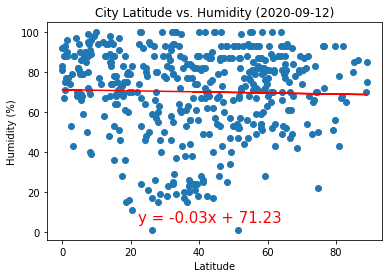

In [48]:
# plt.figure(figsize=(15,6))

plt.scatter(x=x_values, y=y_values)

# Plot the regression line
plt.plot(x_values, regression_values, "red")

# Annotate the plot with the linear equation
plt.annotate(line_eq, (22, 5), fontsize=15, color="red")


plt.title('distribution of cities random generated'.title())
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title(f"City Latitude vs. Humidity ({str(date_rec[1])[:-9]})");
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [49]:
x_values = np.array(clean_city_data['Lat'].loc[clean_city_data['Lat']<0])
y_values = np.array(clean_city_data['Humidity'].loc[clean_city_data['Lat']<0])

# Run the regression and store each of the returned values
slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)

# Calculate the predictions for each value of x
regression_values = x_values * slope + intercept

# store a string version of the linear equation, so we can display it on the plot
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

The r-squared is: 0.0026662572811417115


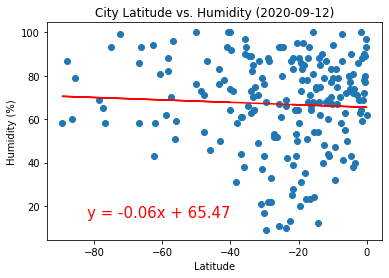

In [50]:
# plt.figure(figsize=(15,6))

plt.scatter(x=x_values, y=y_values)

# Plot the regression line
plt.plot(x_values, regression_values, "red")

# Annotate the plot with the linear equation
plt.annotate(line_eq, (-82, 15), fontsize=15, color="red")


plt.title('distribution of cities random generated'.title())
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title(f"City Latitude vs. Humidity ({str(date_rec[1])[:-9]})");
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [51]:
x_values = np.array(clean_city_data['Lat'].loc[clean_city_data['Lat']>0])
y_values = np.array(clean_city_data['Cloudiness'].loc[clean_city_data['Lat']>0])

# Run the regression and store each of the returned values
slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)

# Calculate the predictions for each value of x
regression_values = x_values * slope + intercept

# store a string version of the linear equation, so we can display it on the plot
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

The r-squared is: 0.0002853103381125671


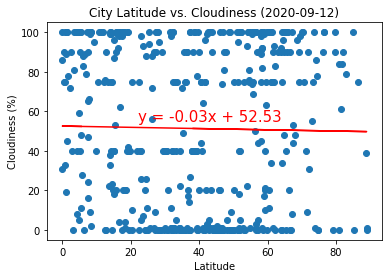

In [55]:
# plt.figure(figsize=(15,6))

plt.scatter(x=x_values, y=y_values)

# Plot the regression line
plt.plot(x_values, regression_values, "red")

# Annotate the plot with the linear equation
plt.annotate(line_eq, (22, 55), fontsize=15, color="red")


plt.title('distribution of cities random generated'.title())
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title(f"City Latitude vs. Cloudiness ({str(date_rec[1])[:-9]})");
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [56]:
x_values = np.array(clean_city_data['Lat'].loc[clean_city_data['Lat']<0])
y_values = np.array(clean_city_data['Cloudiness'].loc[clean_city_data['Lat']<0])

# Run the regression and store each of the returned values
slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)

# Calculate the predictions for each value of x
regression_values = x_values * slope + intercept

# store a string version of the linear equation, so we can display it on the plot
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

The r-squared is: 0.0445502489373499


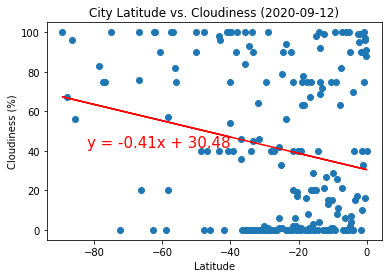

In [57]:
# plt.figure(figsize=(15,6))

plt.scatter(x=x_values, y=y_values)

# Plot the regression line
plt.plot(x_values, regression_values, "red")

# Annotate the plot with the linear equation
plt.annotate(line_eq, (-82, 42), fontsize=15, color="red")


plt.title('distribution of cities random generated'.title())
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title(f"City Latitude vs. Cloudiness ({str(date_rec[1])[:-9]})");
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [58]:
x_values = np.array(clean_city_data['Lat'].loc[clean_city_data['Lat']>0])
y_values = np.array(clean_city_data['Wind Speed'].loc[clean_city_data['Lat']>0])

# Run the regression and store each of the returned values
slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)

# Calculate the predictions for each value of x
regression_values = x_values * slope + intercept

# store a string version of the linear equation, so we can display it on the plot
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

The r-squared is: 0.018986297044525088


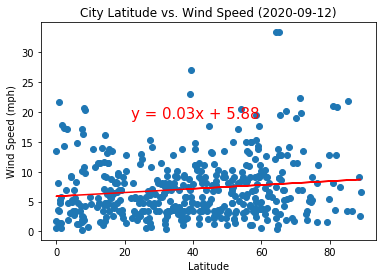

In [61]:
# plt.figure(figsize=(15,6))

plt.scatter(x=x_values, y=y_values)

# Plot the regression line
plt.plot(x_values, regression_values, "red")

# Annotate the plot with the linear equation
plt.annotate(line_eq, (22, 19), fontsize=15, color="red")


plt.title('distribution of cities random generated'.title())
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title(f"City Latitude vs. Wind Speed ({str(date_rec[1])[:-9]})");
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [62]:
x_values = np.array(clean_city_data['Lat'].loc[clean_city_data['Lat']<0])
y_values = np.array(clean_city_data['Wind Speed'].loc[clean_city_data['Lat']<0])

# Run the regression and store each of the returned values
slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)

# Calculate the predictions for each value of x
regression_values = x_values * slope + intercept

# store a string version of the linear equation, so we can display it on the plot
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

The r-squared is: 0.00588564295212376


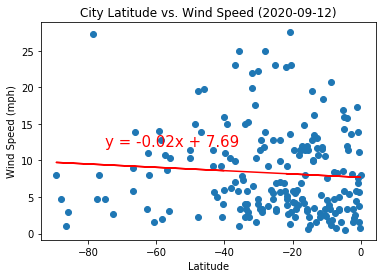

In [64]:
# plt.figure(figsize=(15,6))

plt.scatter(x=x_values, y=y_values)

# Plot the regression line
plt.plot(x_values, regression_values, "red")

# Annotate the plot with the linear equation
plt.annotate(line_eq, (-75, 12), fontsize=15, color="red")


plt.title('distribution of cities random generated'.title())
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title(f"City Latitude vs. Wind Speed ({str(date_rec[1])[:-9]})");
print(f"The r-squared is: {rvalue**2}")
plt.show()